# Tutorial: applying space motion

The `SourceTable` is able to propergate the source positions using the proper motions of the sources. This notebook illustrates how to use the function.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from warpfield.telescope import SourceTable
from warpfield.telescope import get_projection

In [2]:
from astropy.coordinates import SkyCoord
from astropy.table import QTable
from astropy.time import Time
import astropy.units as u

Here, we define an artificial object at the location of M2. The distance to the object is set 1.0 pc. The proper motion is set as follows. Note that `SkyCoord` requires the proper motion along with right ascension corrected by declination. The observation time is set 2016.0, which is the nominal epoch of the Gaia DR3 catalog.

In [9]:
pointing = SkyCoord.from_name('M2')

source = SourceTable(QTable([
    [0],
    [pointing.ra],
    [pointing.dec],
    [150 * u.mas / u.year],
    [-15 * u.mas / u.year],
    [3.0 * u.mas],
    [2016.0 * u.year],
], names=[
    'source_id', 'ra', 'dec', 'pmra', 'pmdec', 'parallax', 'ref_epoch'
]))

The time grid is defined for &pm;600 days.

In [10]:
epoch = Time(2016.0, format='decimalyear', scale='tcb')
obstime = epoch + np.arange(-600,601,10)*u.day

Use `apply_space_motion` to propagate the proper motion. Illustrate the motion of the object.

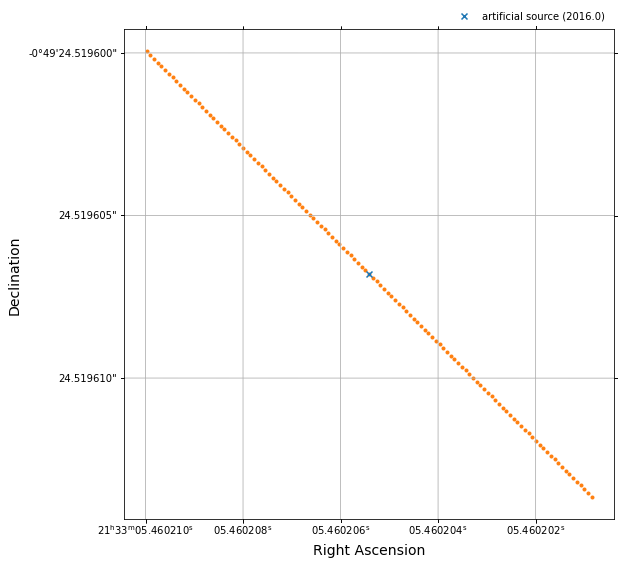

In [8]:
proj = get_projection(pointing)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection=proj)
ax.set_position([0.13,0.10,0.85,0.85])

for t in obstime:
    source.apply_space_motion(t)
    ax.scatter(source.table['ra'], source.table['dec'], color='C1', marker='.')
ax.scatter(pointing.ra, pointing.dec, marker='x', label='artificial source (2016.0)')

ax.legend(bbox_to_anchor=[1,1], loc='lower right', frameon=False)
ax.grid()
ax.set_xlabel('Right Ascension', fontsize=14)
ax.set_ylabel('Declination', fontsize=14)
plt.show()